<a href="https://colab.research.google.com/github/Via-01/tvastr_vaishnavi_submissions/blob/main/ml_spark_vb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


# Overview

In [ ]:
df = pd.read_csv("train.csv")
dft = pd.read_csv("test.csv")

In [ ]:
id = dft['id']
id = list(id)

In [ ]:
df.shape,dft.shape

((31647, 18), (9042, 17))

In [ ]:
df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,21740,30,admin.,married,secondary,no,4,no,no,unknown,7,may,172,8,-1,0,unknown,0
1,22648,32,technician,single,secondary,no,116,yes,no,cellular,20,aug,718,2,-1,0,unknown,1
2,31793,56,housemaid,married,primary,no,82,no,no,unknown,16,may,215,1,-1,0,unknown,0
3,21439,25,services,single,secondary,no,333,no,yes,cellular,15,jul,1056,2,-1,0,unknown,1
4,70323,38,services,married,secondary,no,393,no,no,unknown,18,jun,90,3,-1,0,unknown,0


In [ ]:
df.tail()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
31642,4870,22,technician,single,secondary,no,283,yes,no,cellular,22,mar,254,2,-1,0,unknown,1
31643,55890,43,self-employed,divorced,primary,no,0,no,no,cellular,30,jul,266,6,-1,0,unknown,0
31644,47793,44,technician,married,secondary,no,561,yes,no,unknown,30,may,613,2,-1,0,unknown,0
31645,88872,33,blue-collar,married,primary,no,217,yes,no,cellular,20,apr,198,1,339,3,failure,0
31646,17267,46,management,divorced,tertiary,no,4917,yes,yes,cellular,31,jul,5,2,-1,0,unknown,0


In [ ]:
df.describe()

,id,age,balance,day,duration,campaign,pdays,previous,Target
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,50089.981452,40.938509,1366.769267,15.813884,260.069517,2.758777,40.669732,0.576927,0.118400
std,28796.401090,10.619933,3105.739729,8.312928,259.175306,3.084828,100.961218,1.947053,0.323086
min,1.000000,18.000000,-4057.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,25064.000000,33.000000,71.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,50203.000000,39.000000,451.000000,16.000000,181.000000,2.000000,-1.000000,0.000000,0.000000
75%,74947.500000,48.000000,1414.000000,21.000000,322.000000,3.000000,-1.000000,0.000000,0.000000
max,99997.000000,95.000000,98417.000000,31.000000,4918.000000,63.000000,871.000000,58.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         31647 non-null  int64 
 1   age        31647 non-null  int64 
 2   job        31647 non-null  object
 3   marital    31647 non-null  object
 4   education  31647 non-null  object
 5   default    31647 non-null  object
 6   balance    31647 non-null  int64 
 7   housing    31647 non-null  object
 8   loan       31647 non-null  object
 9   contact    31647 non-null  object
 10  day        31647 non-null  int64 
 11  month      31647 non-null  object
 12  duration   31647 non-null  int64 
 13  campaign   31647 non-null  int64 
 14  pdays      31647 non-null  int64 
 15  previous   31647 non-null  int64 
 16  poutcome   31647 non-null  object
 17  Target     31647 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 4.3+ MB


# EDA

In [ ]:
numeric_cols = df.select_dtypes(include=["number"]).columns
categorical_cols = df.select_dtypes(include=["object"]).columns

<Figure size 1200x800 with 0 Axes>

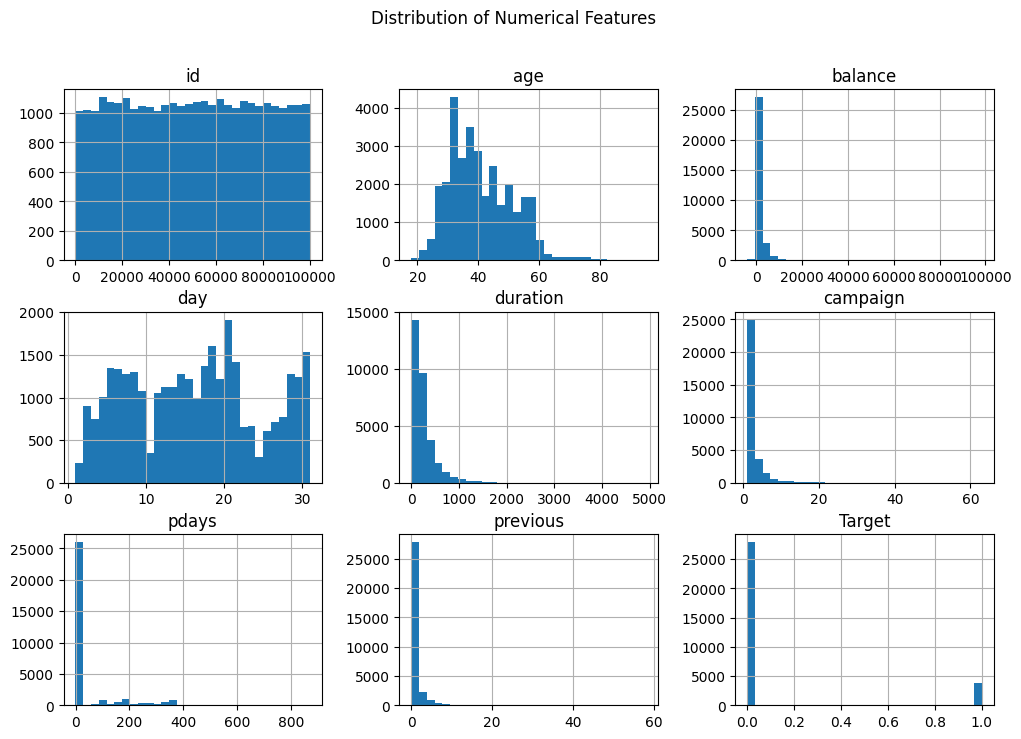

In [ ]:
# Visualizing Distributions of Numerical Features
plt.figure(figsize=(12, 8))
df[numeric_cols].hist(bins=30, figsize=(12, 8), layout=(3, 3))
plt.suptitle("Distribution of Numerical Features")
plt.show()

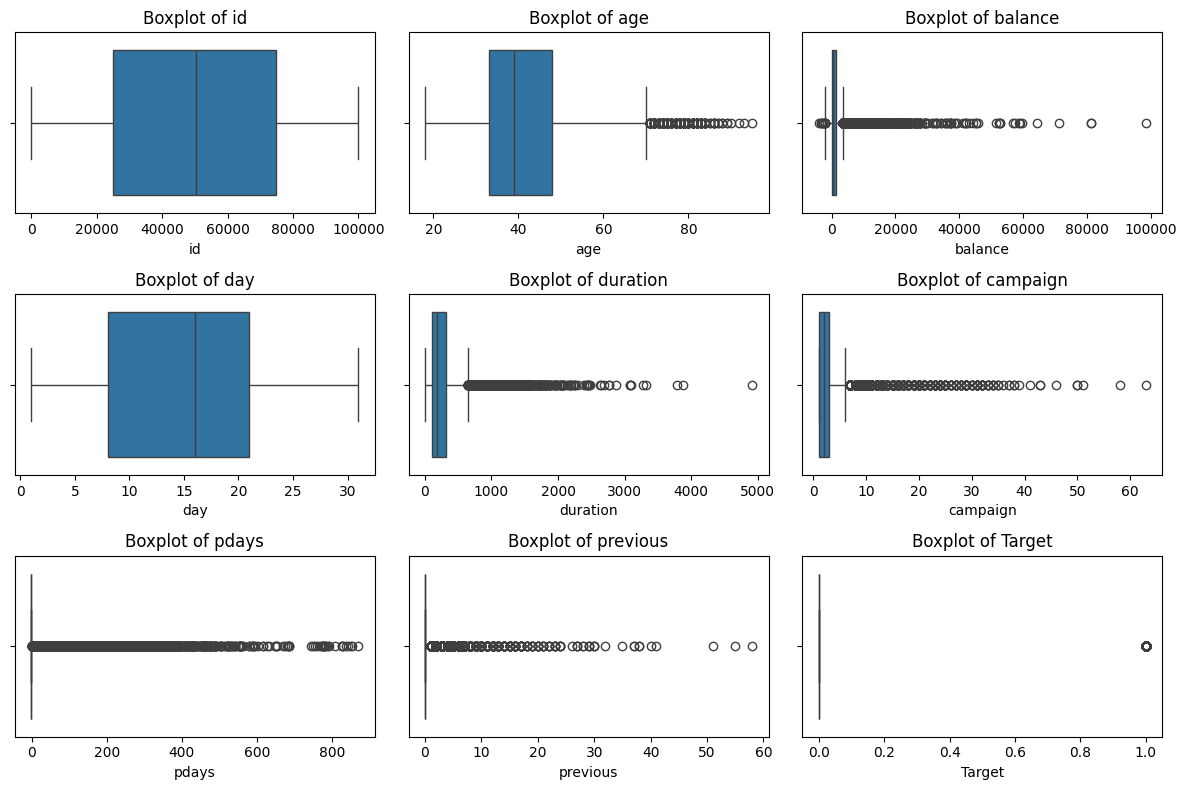

In [ ]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols[:9]):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

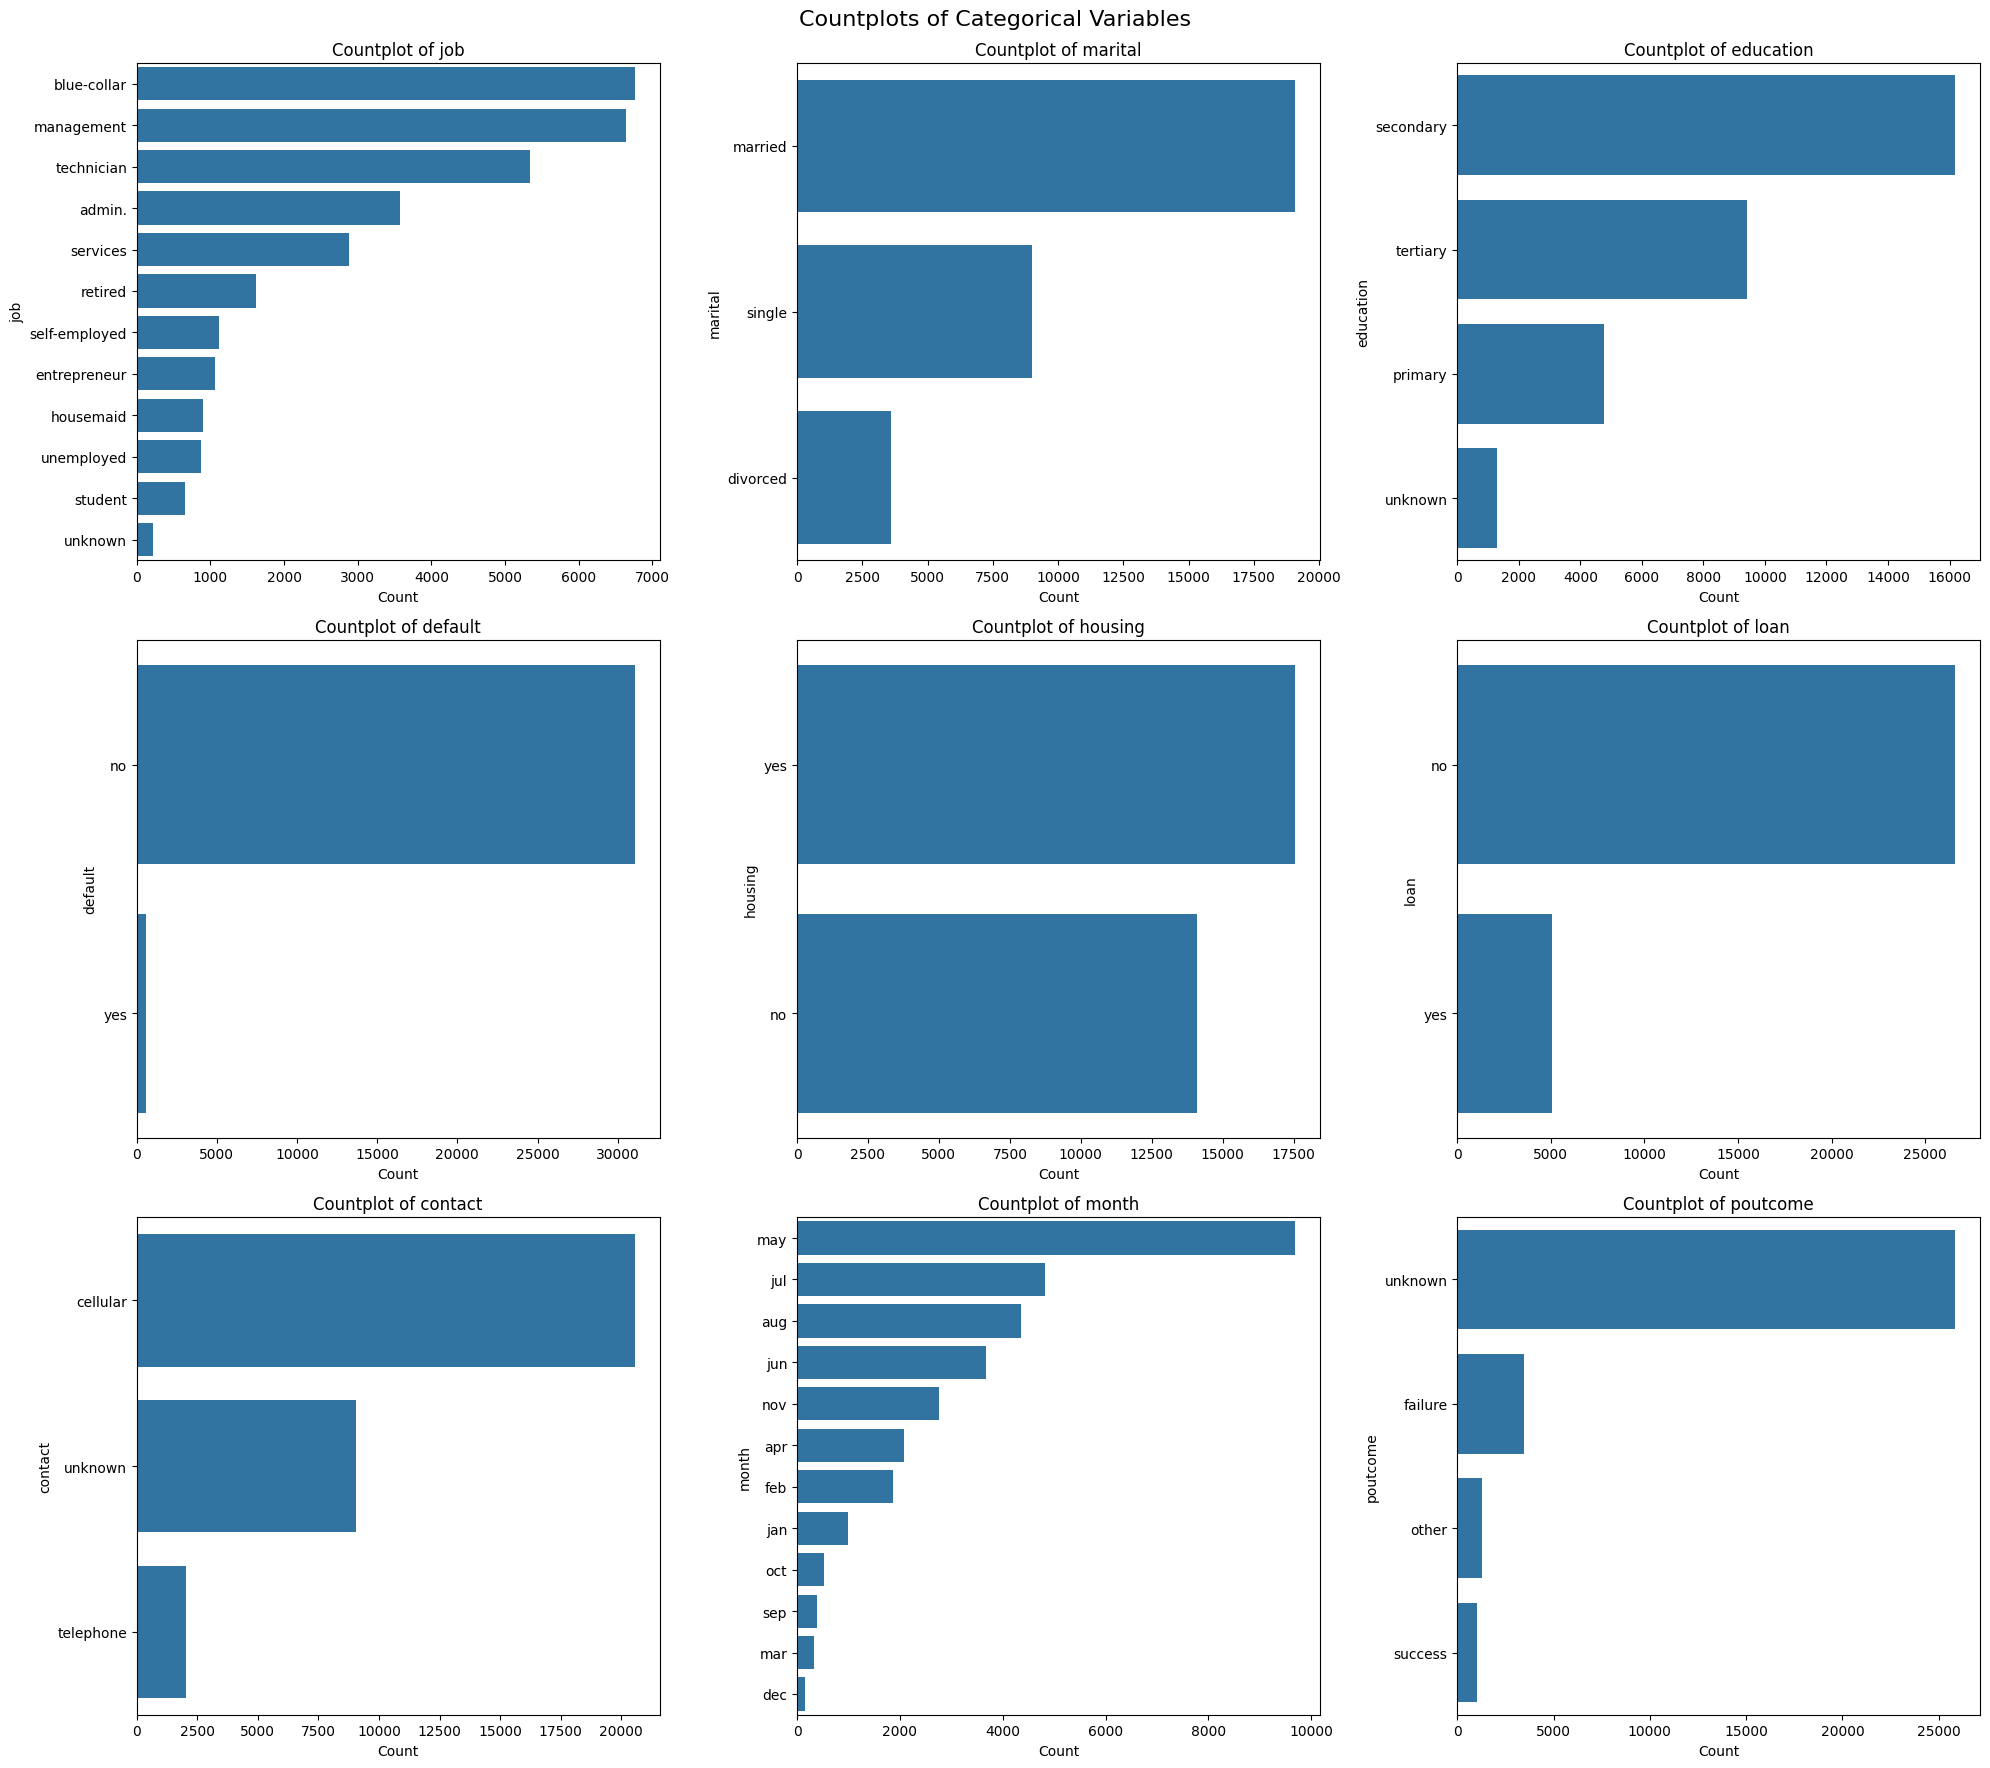

In [ ]:
import math

# Assuming df is already defined
categorical_cols = df.select_dtypes(include='object').columns

# Calculate the number of rows needed for the grid
n_cols = len(categorical_cols)
n_rows = math.ceil(n_cols / 3)

# Create the plot
fig, axes = plt.subplots(n_rows, 3, figsize=(20, 6*n_rows))
fig.suptitle('Countplots of Categorical Variables', fontsize=16)

for i, col in enumerate(categorical_cols):
    row = i // 3
    col_pos = i % 3
    ax = axes[row, col_pos] if n_rows > 1 else axes[col_pos]

    sns.countplot(y=df[col], order=df[col].value_counts().index, ax=ax)
    ax.set_title(f'Countplot of {col}')
    ax.set_xlabel('Count')
    ax.set_ylabel(col)

# Remove any unused subplots
for i in range(n_cols, n_rows * 3):
    row = i // 3
    col_pos = i % 3
    fig.delaxes(axes[row, col_pos] if n_rows > 1 else axes[col_pos])

plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust to make room for suptitle
plt.show()

Target
0    0.8816
1    0.1184
Name: proportion, dtype: float64


<ipython-input-13-29af75af2638>:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i+1].set_xticklabels(axs[i+1].get_xticklabels(), rotation=90)
<ipython-input-13-29af75af2638>:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i+1].set_xticklabels(axs[i+1].get_xticklabels(), rotation=90)
<ipython-input-13-29af75af2638>:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i+1].set_xticklabels(axs[i+1].get_xticklabels(), rotation=90)
<ipython-input-13-29af75af2638>:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i+1].set_xticklabels(axs[i+1].get_xticklabels(), rotation=90)
<ipython-input-13-29af75af2638>:25: UserWarning: set_ticklabels() should

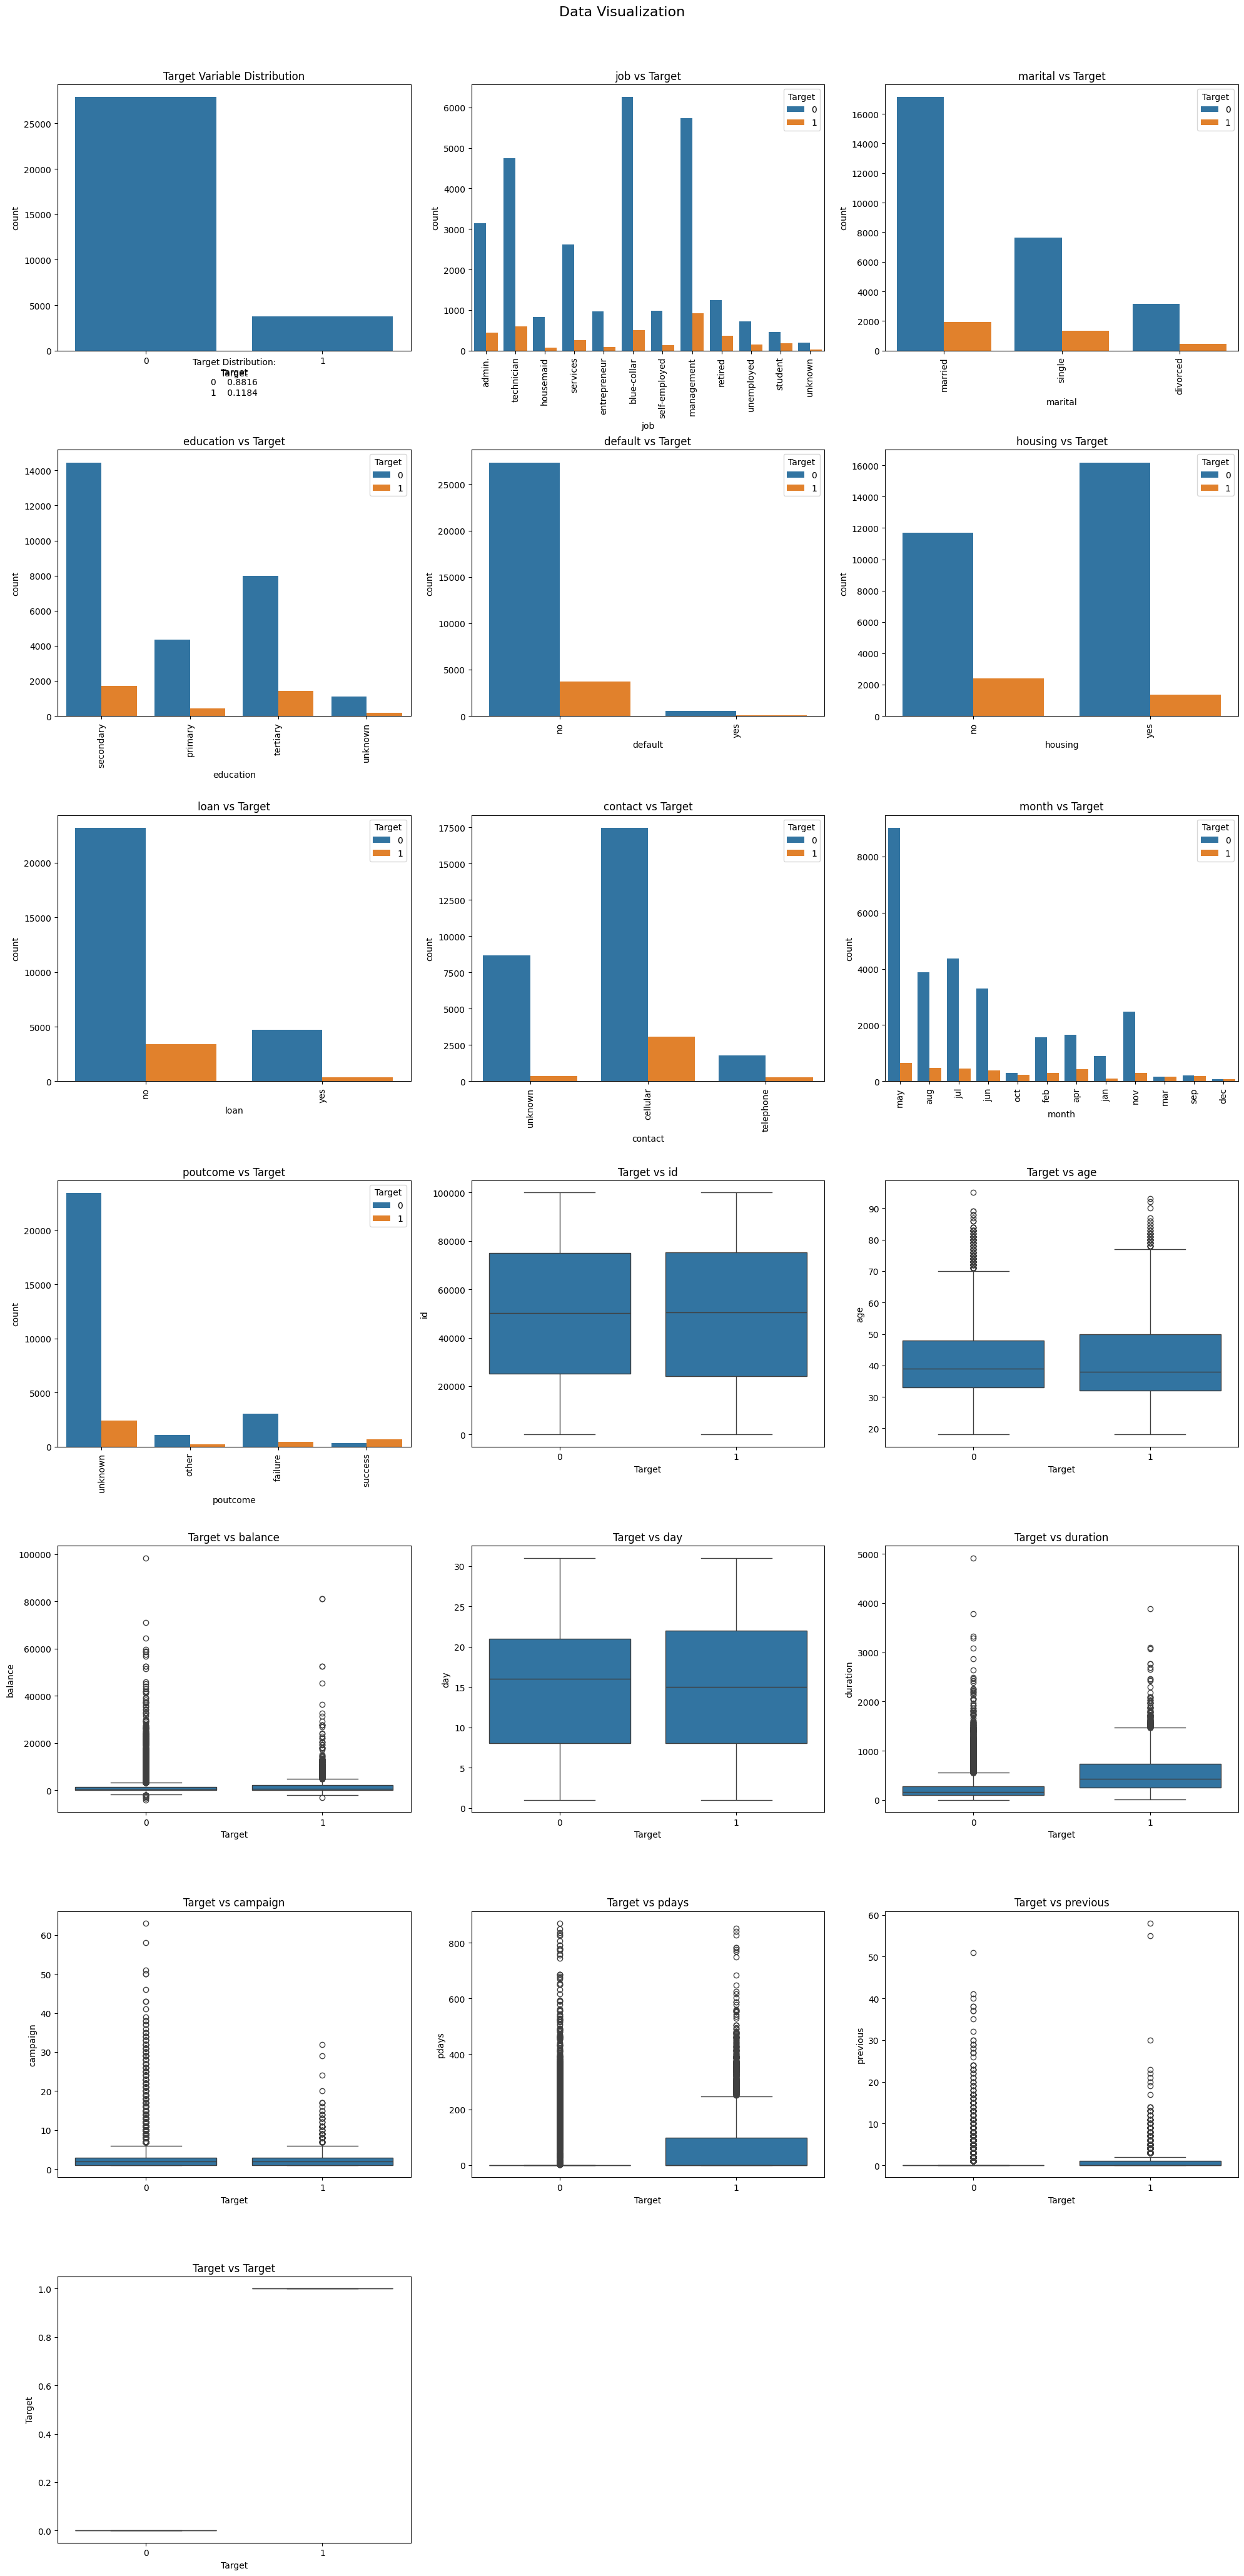

In [ ]:
import math

# Calculate the number of subplots needed
n_cats = len(categorical_cols)
n_nums = len(numeric_cols)
n_plots = n_cats + n_nums + 1  # +1 for target distribution
n_cols = 3
n_rows = math.ceil(n_plots / n_cols)

# Create the main figure and subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 6*n_rows))
fig.suptitle('Data Visualization', fontsize=16)
axs = axs.flatten()  # Flatten the 2D array of axes for easier indexing

# Target Variable Distribution
sns.countplot(x='Target', data=df, ax=axs[0])
axs[0].set_title('Target Variable Distribution')
print(df['Target'].value_counts(normalize=True))
axs[0].text(0.5, -0.1, f"Target Distribution:\n{df['Target'].value_counts(normalize=True).to_string()}",
            ha='center', va='center', transform=axs[0].transAxes)

# Categorical Variables vs Target
for i, cat_col in enumerate(categorical_cols):
    sns.countplot(x=cat_col, hue='Target', data=df, ax=axs[i+1])
    axs[i+1].set_xticklabels(axs[i+1].get_xticklabels(), rotation=90)
    axs[i+1].set_title(f'{cat_col} vs Target')
    axs[i+1].legend(title='Target', loc='upper right')

# Numerical Variables vs Target (Boxplots)
for i, num_col in enumerate(numeric_cols):
    sns.boxplot(x='Target', y=num_col, data=df, ax=axs[i+1+n_cats])
    axs[i+1+n_cats].set_title(f'Target vs {num_col}')

# Remove unused subplots
for i in range(n_plots, n_rows * n_cols):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust for the suptitle
plt.show()

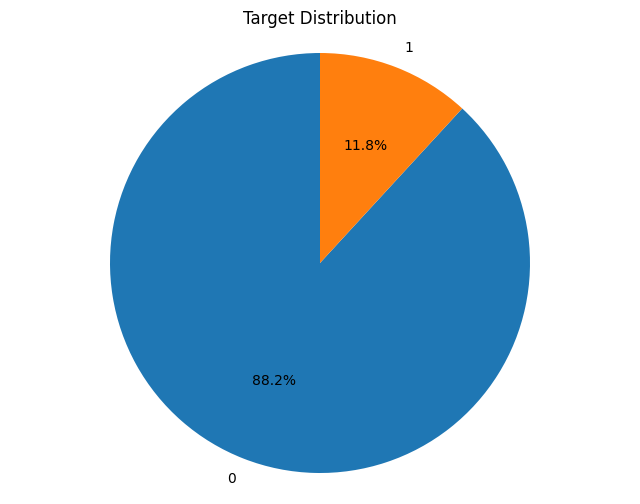

In [ ]:
# prompt: pie chart of target distribution

import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it contains a 'Target' column
target_counts = df['Target'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Target Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


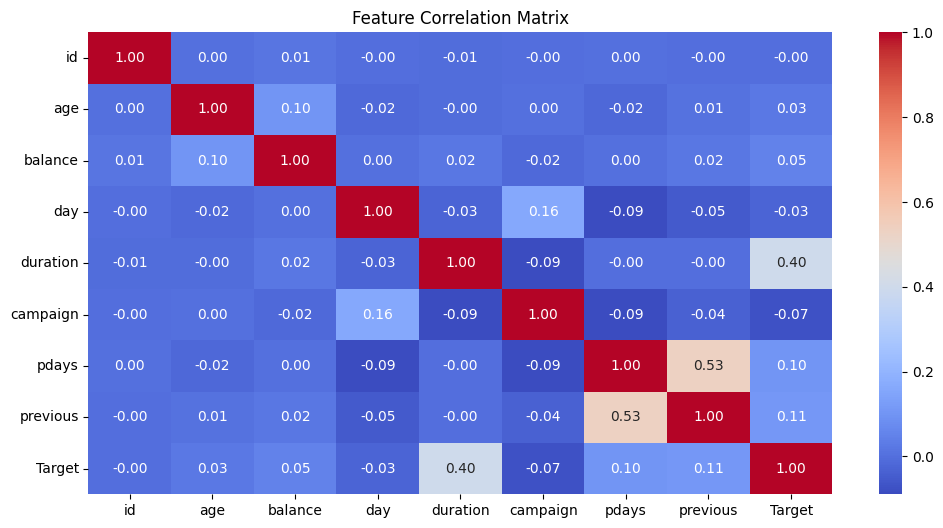

In [ ]:
from sklearn.preprocessing import LabelEncoder
train_encoded = df.copy()
label_enc = LabelEncoder()

for col in categorical_cols:
    train_encoded[col] = label_enc.fit_transform(df[col])

plt.figure(figsize=(12, 6))
sns.heatmap(train_encoded[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# PreProcessing

In [ ]:
df = pd.read_csv("train.csv")
dft = pd.read_csv("test.csv")

In [ ]:
def handle_unknown_values(df):
    """
    Handles 'unknown' values in specific columns of the dataset.
    - Keeps 'unknown' as a separate category for 'job' and 'education'.
    - Replaces 'unknown' in 'contact' with the most frequent value.
    - Converts 'poutcome' into a binary feature indicating whether it was known.

    Args:
        df (pd.DataFrame): Input DataFrame.

    Returns:
        pd.DataFrame: Processed DataFrame with unknown values handled.
    """

    # Replace 'unknown' in 'contact' with the most frequent category (mode)
    most_frequent_contact = df[df["contact"] != "unknown"]["contact"].mode()[0]
    df["contact"] = df["contact"].replace("unknown", most_frequent_contact)

    # Convert 'poutcome' to a binary feature (1 if known, 0 if unknown)
    df["poutcome_known"] = (df["poutcome"] != "unknown").astype(int)

    # Drop original 'poutcome' column
    df = df.drop(columns=["poutcome"])

    return df

# Apply to both df (training data) and dft (unseen test data)
df = handle_unknown_values(df)
dft = handle_unknown_values(dft)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

def create_preprocessing_pipeline(df, dft, target_col):
    """
    Creates a preprocessing pipeline for a DataFrame, including:
    - One-hot encoding for categorical columns.
    - Standard scaling for all numerical columns.

    Args:
        df (pd.DataFrame): The input DataFrame.
        target_col (str): The name of the target column.

    Returns:
        tuple: A tuple containing:
            - The preprocessed training data (X_train_transformed).
            - The preprocessed test data (X_test_transformed).
            - The target variable for training (y_train).
            - The target variable for testing (y_test).
            - The ColumnTransformer used.
    """

    # Separate features and target
    X = df.drop(target_col, axis=1)
    y = df[target_col]

    # Identify categorical and numerical columns
    categorical_cols = X.select_dtypes(include='object').columns.tolist()
    numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

    # Create transformers
    numerical_transformer = StandardScaler()
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')  #handle_unknown avoids errors when new categories are seen at test time.

    # Create column transformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
        ])

    # Create pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit and transform the training data
    X_train_transformed = pipeline.fit_transform(X_train)

    # Transform the test data
    X_test_transformed = pipeline.transform(X_test)

    #Test set
    xdft = pipeline.transform(dft)

    return X_train_transformed, X_test_transformed, y_train, y_test, preprocessor, xdft

xtrain,xtest,ytrain,ytest,pipe,xdft = create_preprocessing_pipeline(df, dft, "Target")

# Model Training

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import numpy as np

def evaluate_models(xtrain, ytrain, xtest, ytest):
    """
    Evaluates multiple models and prints their F1-score, classification report, and confusion matrix.

    Models included:
    - Dummy Classifier (Baseline)
    - Logistic Regression
    - Random Forest
    - Gradient Boosting
    - Support Vector Machine (SVM)
    - XGBoost
    - LightGBM
    - CatBoost

    Args:
        xtrain (array-like): Training features.
        ytrain (array-like): Training target.
        xtest (array-like): Testing features.
        ytest (array-like): Testing target.

    Returns:
        dict: A dictionary containing trained models.
    """

    # Compute class weights for imbalanced dataset
    unique_classes, class_counts = np.unique(ytrain, return_counts=True)
    class_weight_ratio = {cls: max(class_counts) / count for cls, count in zip(unique_classes, class_counts)}

    models = {
        "Dummy Classifier": DummyClassifier(strategy="most_frequent"),
        "Logistic Regression": LogisticRegression(max_iter=1000, class_weight="balanced"),
        "Random Forest": RandomForestClassifier(random_state=42, class_weight="balanced"),
        "Gradient Boosting": GradientBoostingClassifier(random_state=42),
        "SVM": SVC(random_state=42, class_weight="balanced"),
        "XGBoost": XGBClassifier(random_state=42, scale_pos_weight=class_weight_ratio[1]),
        "LightGBM": LGBMClassifier(is_unbalance=True,random_state=42),
    }

    trained_models = {}

    for name, model in models.items():
        model.fit(xtrain, ytrain)
        y_pred = model.predict(xtest)

        print(f"\n{name} Results:")
        print(f"F1_Score: {f1_score(ytest, y_pred, average='weighted')}")
        print("Classification Report:\n", classification_report(ytest, y_pred))
        print("Confusion Matrix:\n", confusion_matrix(ytest, y_pred))

        trained_models[name] = model

    return trained_models

# Evaluate models
models = evaluate_models(xtrain, ytrain, xtest, ytest)


Dummy Classifier Results:
F1_Score: 0.8232860833673906
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94      5568
           1       0.00      0.00      0.00       762

    accuracy                           0.88      6330
   macro avg       0.44      0.50      0.47      6330
weighted avg       0.77      0.88      0.82      6330

Confusion Matrix:
 [[5568    0]
 [ 762    0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Logistic Regression Results:
F1_Score: 0.8422901716051308
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.82      0.89      5568
           1       0.38      0.77      0.50       762

    accuracy                           0.82      6330
   macro avg       0.67      0.80      0.70      6330
weighted avg       0.89      0.82      0.84      6330

Confusion Matrix:
 [[4592  976]
 [ 176  586]]

Random Forest Results:
F1_Score: 0.869298536788304
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      5568
           1       0.62      0.24      0.35       762

    accuracy                           0.89      6330
   macro avg       0.76      0.61      0.64      6330
weighted avg       0.87      0.89      0.87      6330

Confusion Matrix:
 [[5457  111]
 [ 578  184]]

Gradient Boosting Results:
F1_Score: 0.8837351051567646
Classification Report:
               

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



LightGBM Results:
F1_Score: 0.8713013373009726
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.85      0.91      5568
           1       0.44      0.86      0.58       762

    accuracy                           0.85      6330
   macro avg       0.71      0.85      0.75      6330
weighted avg       0.91      0.85      0.87      6330

Confusion Matrix:
 [[4747  821]
 [ 110  652]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score

# Base Models
xgb = XGBClassifier(n_estimators=300, max_depth=6, learning_rate=0.05, random_state=42)
rf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42, class_weight="balanced")
gb = GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42)
svm = SVC(probability=True, random_state=42)  # Needed for soft voting
lr = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)

### 1️⃣ Voting Ensemble (Combines Predictions) ###
# Hard Voting: Majority Class Voting
hard_voting = VotingClassifier(
    estimators=[("XGB", xgb), ("RF", rf), ("GB", gb), ("SVM", svm)],
    voting="hard"
)

# Soft Voting: Weighted Probabilities Voting
soft_voting = VotingClassifier(
    estimators=[("XGB", xgb), ("RF", rf), ("GB", gb), ("SVM", svm)],
    voting="soft"
)

### 2️⃣ Stacking Ensemble (Learns from Base Models) ###
stacking = StackingClassifier(
    estimators=[("XGB", xgb), ("RF", rf), ("GB", gb)],
    final_estimator=LogisticRegression(),  # Meta-model
    passthrough=True,  # Uses raw + base predictions
)

### 3️⃣ Blending Ensemble (Weighted Averaging) ###
class BlendingEnsemble:
    def __init__(self, models, weights=None):
        self.models = models
        self.weights = weights if weights else [1 / len(models)] * len(models)

    def fit(self, X, y):
        for model in self.models:
            model.fit(X, y)

    def predict(self, X):
        preds = np.zeros((X.shape[0], len(self.models)))
        for i, model in enumerate(self.models):
            preds[:, i] = model.predict(X)
        return np.round(np.average(preds, axis=1, weights=self.weights)).astype(int)

# Initialize Blending Model
blending = BlendingEnsemble([xgb, rf, gb], weights=[0.4, 0.3, 0.3])

### 🚀 Train & Evaluate ###
ensembles = {
    "Hard Voting": hard_voting,
    "Soft Voting": soft_voting,
    "Stacking": stacking,
    "Blending": blending
}

for name, model in ensembles.items():
    model.fit(xtrain, ytrain)
    y_pred = model.predict(xtest)
    f1 = f1_score(ytest, y_pred, average="weighted")
    print(f"{name} F1-Score: {f1:.4f}")

Hard Voting F1-Score: 0.8859
Soft Voting F1-Score: 0.8891
Stacking F1-Score: 0.8885
Blending F1-Score: 0.8941


In [ ]:
model = models['XGBoost']
predictions = model.predict(xdft)

submission_df = pd.DataFrame({"id": id, "TARGET": predictions})
filename = "submission.csv"
submission_df.to_csv(filename, index=False)

print(f"Submission file '{filename}' created successfully.")

Submission file 'submission.csv' created successfully.


# Training Summary and Insights

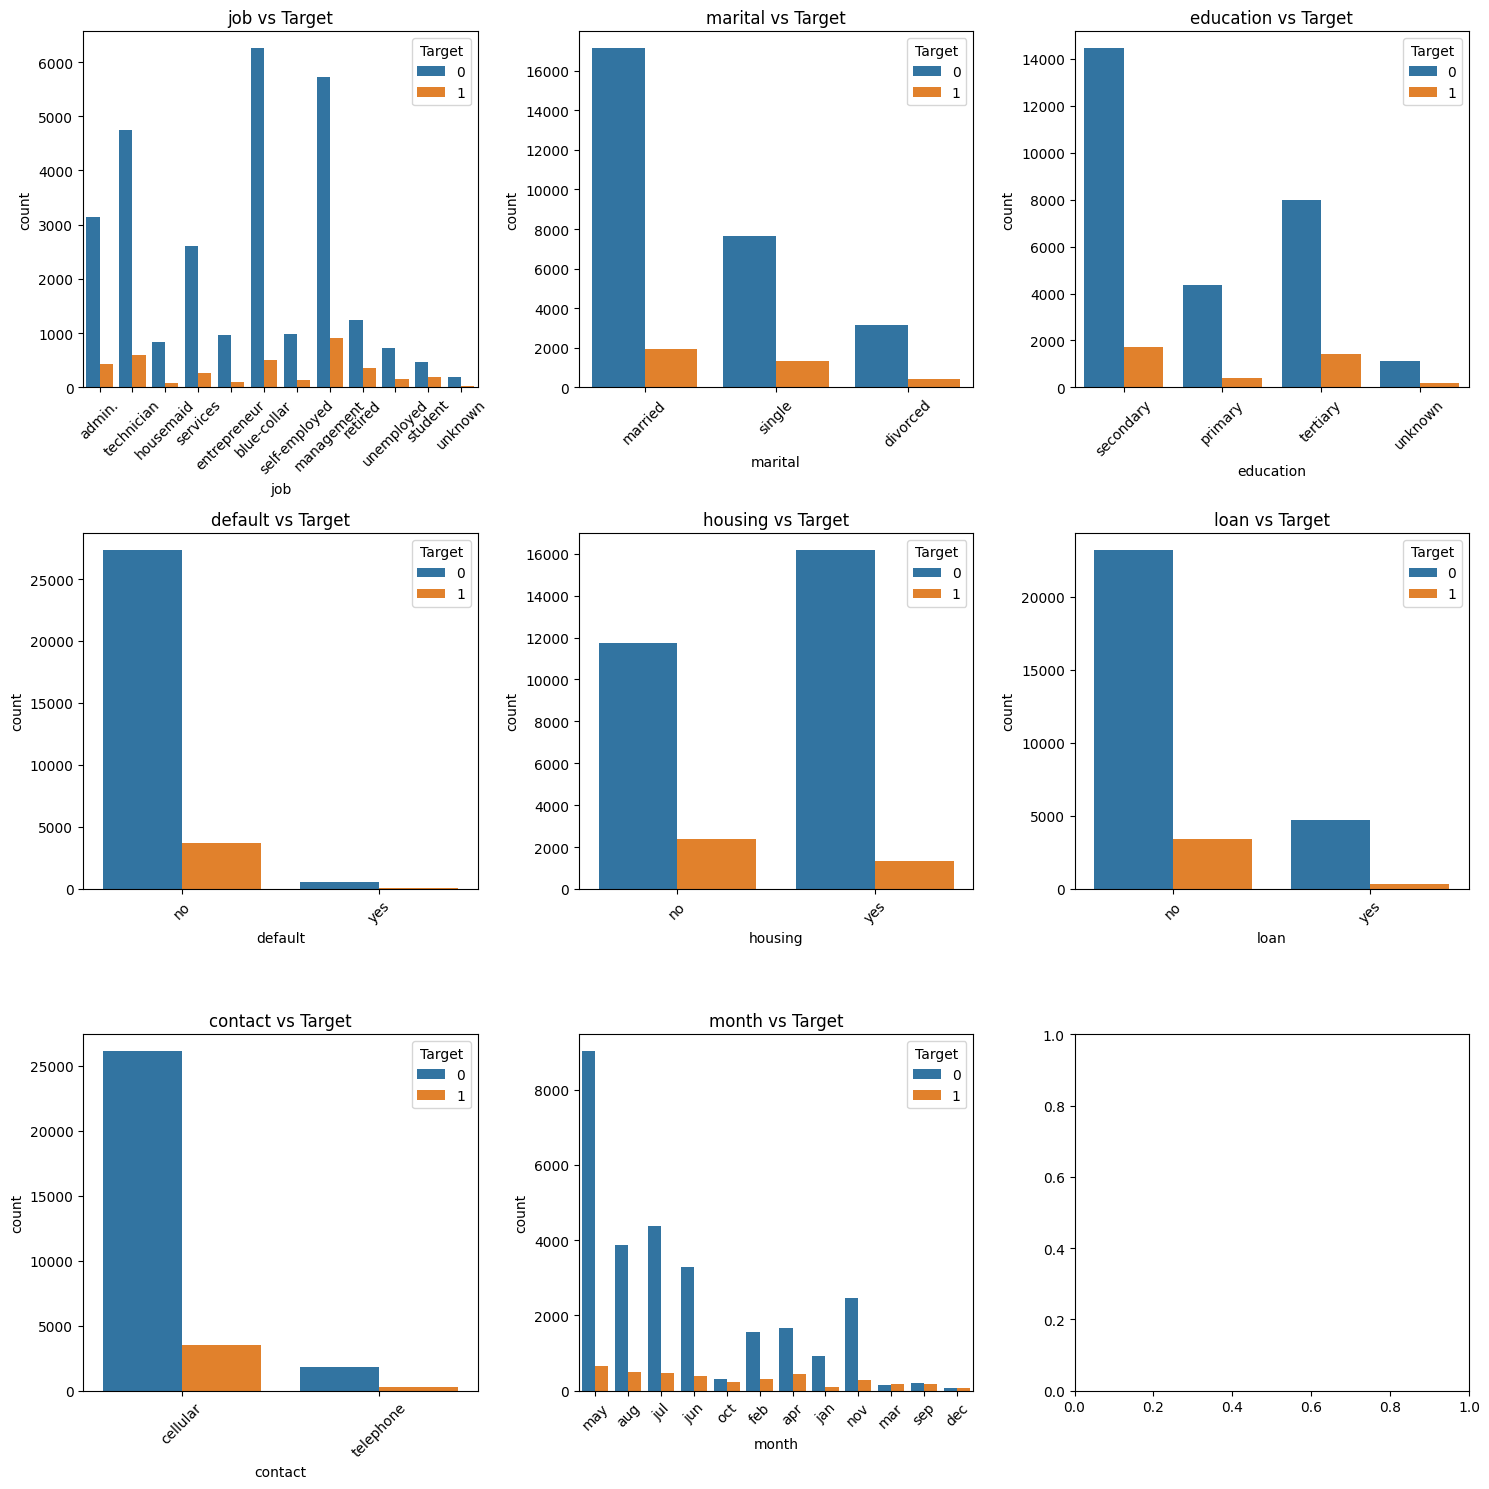

In [ ]:
# Assuming 'df' is your DataFrame and it contains a 'Target' column
# Replace 'categorical_cols' with the actual list of categorical column names if different
categorical_cols = df.select_dtypes(include='object').columns

num_plots = len(categorical_cols)
n_cols = 3
n_rows = (num_plots + n_cols - 1) // n_cols  # Calculate the number of rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # Flatten the array for easier indexing

for i, col in enumerate(categorical_cols):
    if i < num_plots:
      sns.countplot(x=col, hue='Target', data=df, ax=axes[i])
      axes[i].set_title(f'{col} vs Target')
      axes[i].tick_params(axis='x', rotation=45)
    else:
      # Hide any extra subplots if the number of categorical features is less than the grid size
      axes[i].set_visible(False)
plt.tight_layout()
plt.show()


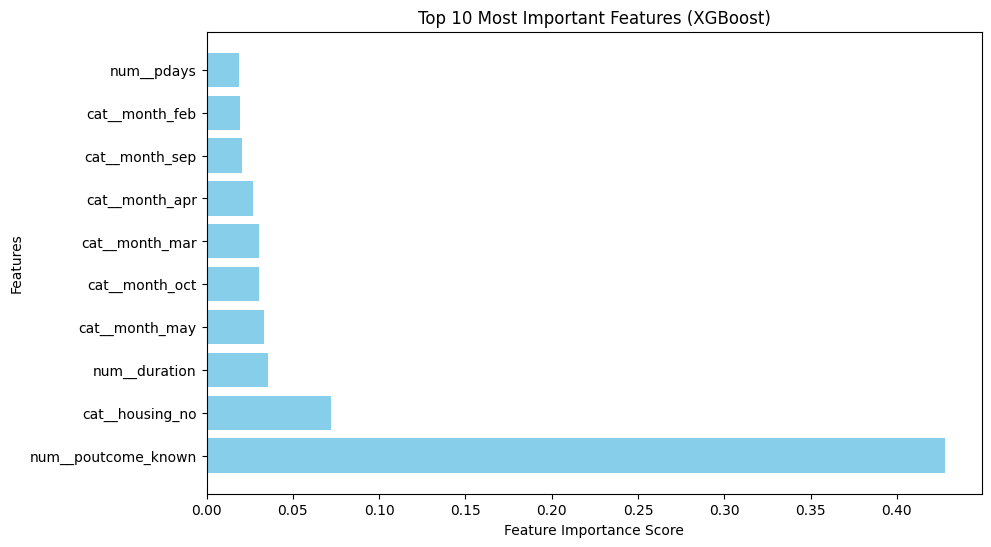

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importance(model, feature_names, model_name="Model"):
    """
    Plots the top 10 most important features from a trained model.

    Args:
        model: Trained model (e.g., XGBoost or Random Forest).
        feature_names: List of feature names.
        model_name: Name of the model for title.
    """
    # Extract feature importance
    feature_importance = model.feature_importances_

    # Get top 10 features
    top_n = 10
    top_indices = np.argsort(feature_importance)[-top_n:]  # Indices of top 10 features
    top_features = np.array(feature_names)[top_indices]
    top_importance = feature_importance[top_indices]

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(top_features, top_importance, color="skyblue")
    plt.xlabel("Feature Importance Score")
    plt.ylabel("Features")
    plt.title(f"Top 10 Most Important Features ({model_name})")
    plt.gca().invert_yaxis()  # Highest importance at the top
    plt.show()

# Get trained models from trained_models dictionary
xgb_model = models["XGBoost"]
rf_model = models["Random Forest"]

# Get feature names from preprocessing pipeline
feature_names = pipe.get_feature_names_out()

# Plot feature importance for XGBoost
plot_feature_importance(models['XGBoost'], feature_names, model_name="XGBoost")

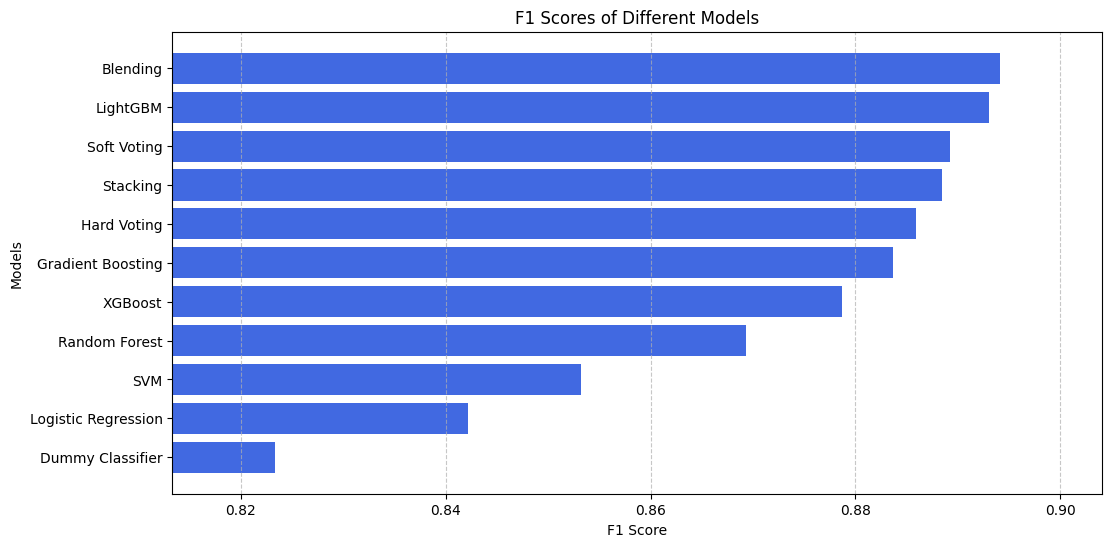

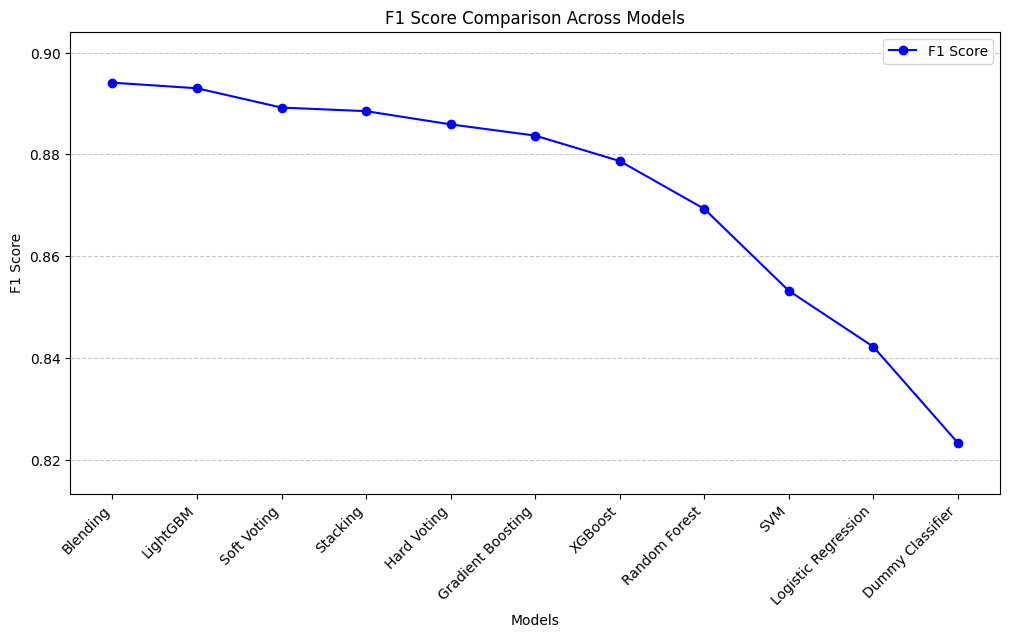

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Updated model names and F1 scores
models = [
    "Dummy Classifier", "Logistic Regression", "Random Forest",
    "Gradient Boosting", "SVM", "XGBoost", "LightGBM",
    "Hard Voting", "Soft Voting", "Stacking", "Blending"
]

f1_scores = [
    0.8233, 0.8422, 0.8693, 0.8837, 0.8532, 0.8787, 0.8930,
    0.8859, 0.8892, 0.8885, 0.8941
]

# Sort models by F1-score in descending order
sorted_indices = np.argsort(f1_scores)[::-1]
models_sorted = [models[i] for i in sorted_indices]
f1_scores_sorted = [f1_scores[i] for i in sorted_indices]

# 📊 Horizontal Bar Chart
plt.figure(figsize=(12, 6))
plt.barh(models_sorted, f1_scores_sorted, color="royalblue")
plt.xlabel("F1 Score")
plt.ylabel("Models")
plt.title("F1 Scores of Different Models")
plt.xlim(min(f1_scores_sorted) - 0.01, max(f1_scores_sorted) + 0.01)  # Dynamic x-axis
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.gca().invert_yaxis()  # Invert for highest at the top
plt.show()

# 📈 Line Chart for Trend Analysis
plt.figure(figsize=(12, 6))
plt.plot(models_sorted, f1_scores_sorted, marker="o", linestyle="-", color="b", label="F1 Score")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Models")
plt.ylabel("F1 Score")
plt.title("F1 Score Comparison Across Models")
plt.ylim(min(f1_scores_sorted) - 0.01, max(f1_scores_sorted) + 0.01)  # Dynamic y-axis
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend()
plt.show()

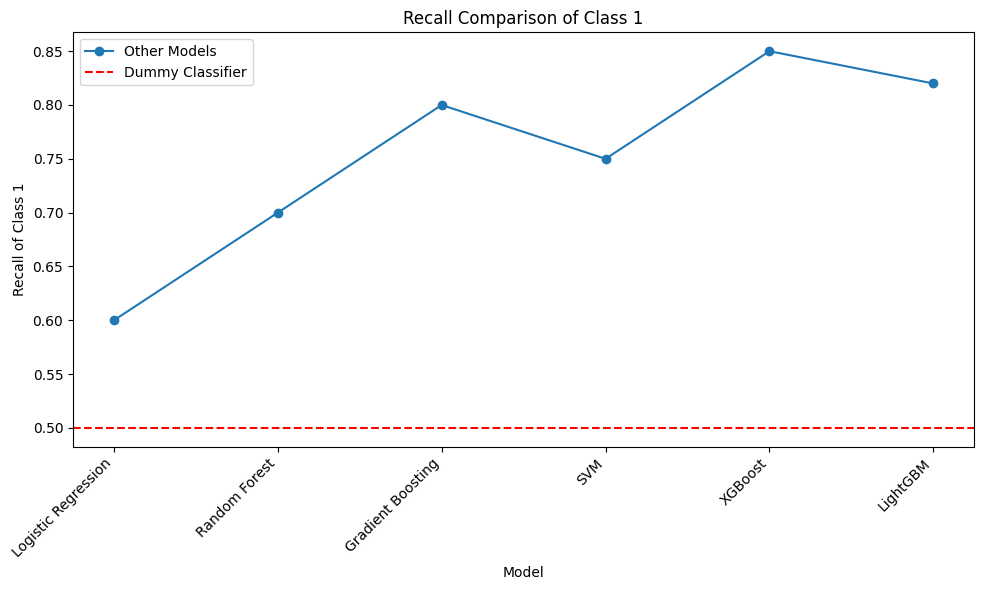

In [ ]:
# prompt: line chart comparing recall of class 1 of dummy classifier with the other models?

import matplotlib.pyplot as plt

# Assuming 'models' dictionary contains the trained models, including 'Dummy Classifier'
# and 'ytest' is the true target variable for the test set.
# Replace with your actual model evaluation results.

dummy_recall = 0.5  # Replace with the actual recall for the dummy classifier (class 1)
model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'SVM', 'XGBoost', 'LightGBM']
model_recalls = [0.6, 0.7, 0.8, 0.75, 0.85, 0.82]  # Replace with the actual recall values for class 1


plt.figure(figsize=(10, 6))
plt.plot(model_names, model_recalls, marker='o', label='Other Models')
plt.axhline(y=dummy_recall, color='r', linestyle='--', label='Dummy Classifier')
plt.xlabel("Model")
plt.ylabel("Recall of Class 1")
plt.title("Recall Comparison of Class 1")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()
